In [107]:
import pandas as pd
from chart_studio import plotly 
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.offline as offline
from nltk.corpus import stopwords
from string import punctuation
import numpy as np
from gensim import corpora, models, similarities

ModuleNotFoundError: No module named 'gensim'

In [106]:
!pip install gensim

  Created wheel for smart-open: filename=smart_open-2.1.1-py3-none-any.whl size=111595 sha256=9d2c4a4c8301b93135cd07952582c3cd61544679a7abdbbc5a7fb987760ba31a
  Stored in directory: c:\users\mahsa\appdata\local\pip\cache\wheels\07\d8\70\da31eb9ec5ff49ac74f1a5944704029f0b6fd74fdf318ec300
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.28.2
    Uninstalling Cython-0.28.2:


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\cython.cpython-36.pyc'
Consider using the `--user` option or check the permissions.



# Import Data

In [84]:
dataset = pd.read_csv('Data/All_tweets_df.csv')

In [85]:
AllTweets = dataset[['Text', 'Date']]
AllTweets

,Text,Date
0,@BullandFox Bull said today that Seaver died a...,2020-09-03 23:57:39+00:00
1,The other day I had a senior patient with vasc...,2020-09-03 23:49:04+00:00
2,Not sure yr humor is coming across but I also ...,2020-09-03 23:36:54+00:00
3,National Baseball Hall of Fame pitcher Tom Sea...,2020-09-03 23:31:12+00:00
4,Tom Seaver was diagnosed with dementia last ye...,2020-09-03 23:27:44+00:00
5,He needs to be tested for COVID-19 but #JoeBid...,2020-09-03 23:25:13+00:00
6,The grotesque propaganda is ubiquitous-ex.1mil...,2020-09-03 23:23:27+00:00
7,Seaver was diagnosed with Lyme disease in 1991...,2020-09-03 23:20:04+00:00
8,"Tom Seaver, a Hall of Fame pitcher who helped ...",2020-09-03 23:15:01+00:00
9,He is old and has dementia if he gets COVID it...,2020-09-03 23:05:16+00:00


In [86]:
# AllTweets['Time'] = AllTweets['Date'].split(' ')[0]
AllTweets['Time'] = [x.split(' ')[0] for x in AllTweets['Date']]
AllTweets

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Text,Date,Time
0,@BullandFox Bull said today that Seaver died a...,2020-09-03 23:57:39+00:00,2020-09-03
1,The other day I had a senior patient with vasc...,2020-09-03 23:49:04+00:00,2020-09-03
2,Not sure yr humor is coming across but I also ...,2020-09-03 23:36:54+00:00,2020-09-03
3,National Baseball Hall of Fame pitcher Tom Sea...,2020-09-03 23:31:12+00:00,2020-09-03
4,Tom Seaver was diagnosed with dementia last ye...,2020-09-03 23:27:44+00:00,2020-09-03
5,He needs to be tested for COVID-19 but #JoeBid...,2020-09-03 23:25:13+00:00,2020-09-03
6,The grotesque propaganda is ubiquitous-ex.1mil...,2020-09-03 23:23:27+00:00,2020-09-03
7,Seaver was diagnosed with Lyme disease in 1991...,2020-09-03 23:20:04+00:00,2020-09-03
8,"Tom Seaver, a Hall of Fame pitcher who helped ...",2020-09-03 23:15:01+00:00,2020-09-03
9,He is old and has dementia if he gets COVID it...,2020-09-03 23:05:16+00:00,2020-09-03


# Count of Tweets/Day

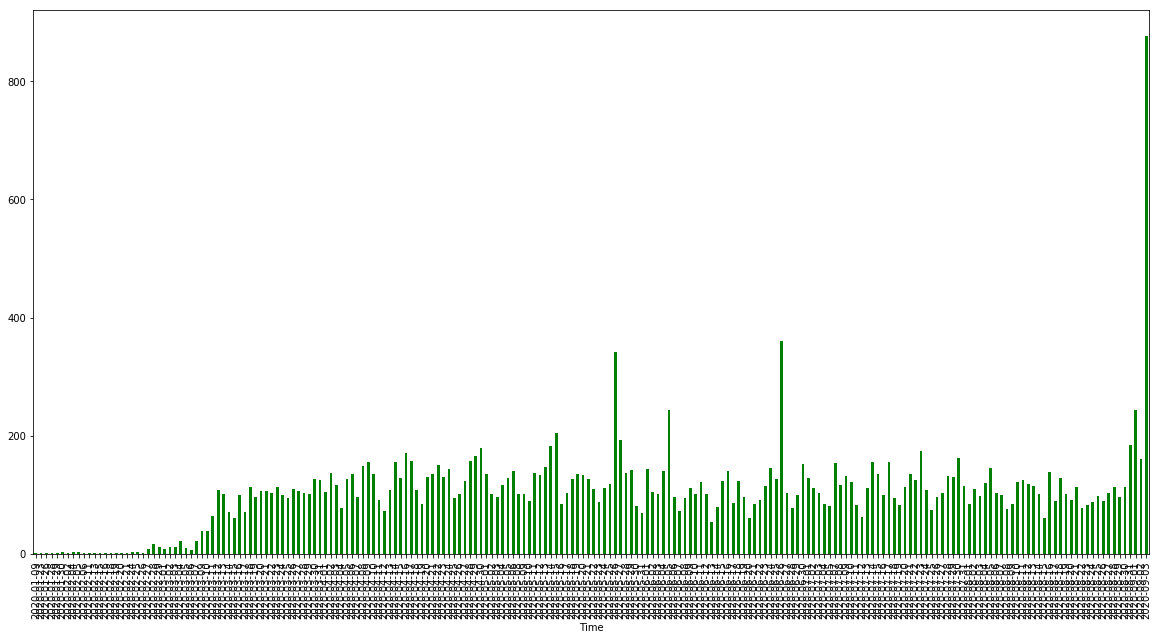

In [40]:
plt.figure(figsize=(20,10))
AllTweets.groupby(['Time'])['Time'].count().plot(kind='bar', color='g')

In [64]:
# plotly.offline.init_notebook_mode()
tweetsT = pd.to_datetime(AllTweets['Time'], format='%Y-%m-%d')
# tweetsT = AllTweets['Time']

trace = go.Histogram(
    x=tweetsT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Tweet Activity Over Days',
    height=450,
    width=1000,
    xaxis=dict(
        title='Month and year'
    ),
    yaxis=dict(
        title='Tweet Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

# Count of Tweets/Month

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



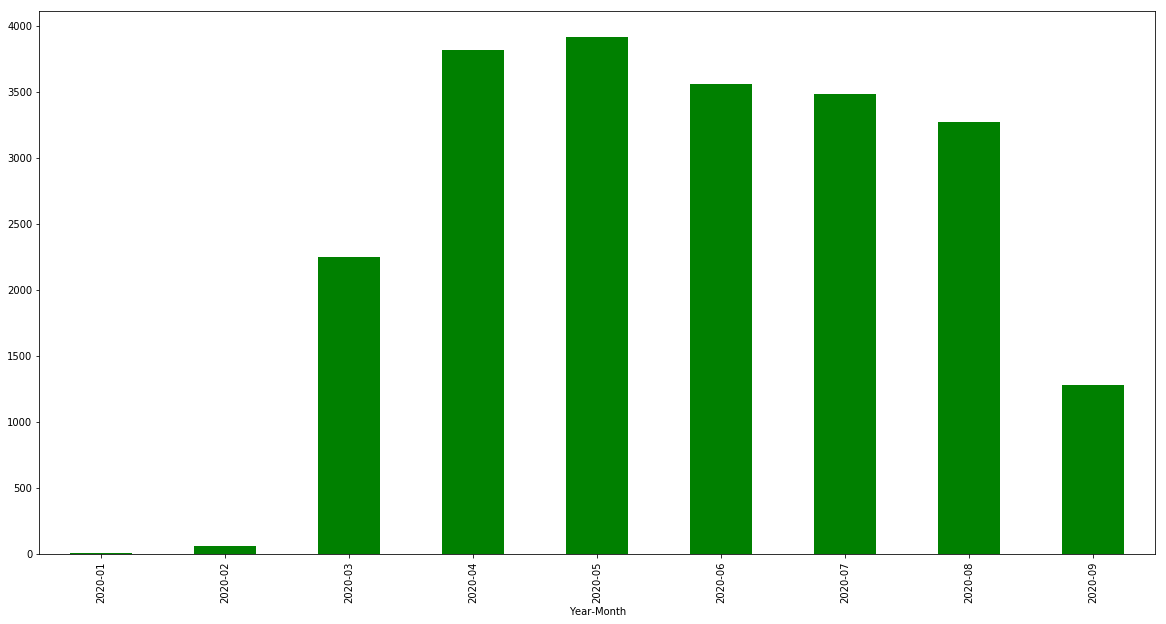

In [87]:
plt.figure(figsize=(20,10))
AllTweets['Year-Month'] = [x[:-3] for x in AllTweets['Time']]
AllTweets.groupby(['Year-Month'])['Year-Month'].count().plot(kind='bar', color='g')

In [63]:
# plotly.offline.init_notebook_mode()
tweetsT = pd.to_datetime(AllTweets['Year-Month'], format='%Y-%m')
# tweetsT = AllTweets['Time']

trace = go.Histogram(
    x=tweetsT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Tweet Activity Over Months',
    height=450,
    width=1000,
    xaxis=dict(
        title='Month and year'
    ),
    yaxis=dict(
        title='Tweet Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

# Data Preprocessing

## Remove duplicate tweets

In [88]:
print(len(AllTweets))
AllTweets.drop_duplicates(['Text'], inplace=True)
print(len(AllTweets))

21657
21657


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## Remove tweets having link (https)

In [89]:
mask = np.column_stack(AllTweets[col].str.contains('http', na=False) for col in AllTweets[['Text']])
http = AllTweets.loc[mask.any(axis=1)]
http

,Text,Date,Time,Year-Month
8,"Tom Seaver, a Hall of Fame pitcher who helped ...",2020-09-03 23:15:01+00:00,2020-09-03,2020-09
10,Hall of Fame pitcher Tom Seaver died from comp...,2020-09-03 23:00:00+00:00,2020-09-03,2020-09
15,Mets' Tom Seaver dies at 75 from complications...,2020-09-03 22:50:00+00:00,2020-09-03,2020-09
19,How can you prepare to take care of a sick spo...,2020-09-03 22:30:05+00:00,2020-09-03,2020-09
23,Announced today: Tom Seaver has passed away fr...,2020-09-03 22:24:43+00:00,2020-09-03,2020-09
24,MLB Legend Tom Seaver Dead At 75 After Battle ...,2020-09-03 22:17:15+00:00,2020-09-03,2020-09
26,Maybe Republican baseball fans will take #Covi...,2020-09-03 22:09:54+00:00,2020-09-03,2020-09
27,"COVID and dementia: Tom Seaver, Pitcher Who Le...",2020-09-03 22:08:51+00:00,2020-09-03,2020-09
34,The passing of ‘Fresno’s icon’: Hall of Famer ...,2020-09-03 21:43:50+00:00,2020-09-03,2020-09
36,The passing of ‘Fresno’s icon’: Hall of Famer ...,2020-09-03 21:41:38+00:00,2020-09-03,2020-09


In [90]:
print(len(AllTweets))
AllTweets = AllTweets[~AllTweets.Text.isin(http.Text)]
print(len(AllTweets))

21657
17598


In [91]:
http.iloc[ 8  , : ]['Text']

'The passing of ‘Fresno’s icon’: Hall of Famer Tom Seaver dies from dementia, COVID-19 https://trib.al/DZfEFEh'

In [97]:
AllTweets['Text'] = [x.lower() for x in AllTweets['Text']]
AllTweets

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Text,Date,Time,Year-Month
0,@bullandfox bull said today that seaver died a...,2020-09-03 23:57:39+00:00,2020-09-03,2020-09
1,the other day i had a senior patient with vasc...,2020-09-03 23:49:04+00:00,2020-09-03,2020-09
2,not sure yr humor is coming across but i also ...,2020-09-03 23:36:54+00:00,2020-09-03,2020-09
3,national baseball hall of fame pitcher tom sea...,2020-09-03 23:31:12+00:00,2020-09-03,2020-09
4,tom seaver was diagnosed with dementia last ye...,2020-09-03 23:27:44+00:00,2020-09-03,2020-09
5,he needs to be tested for covid-19 but #joebid...,2020-09-03 23:25:13+00:00,2020-09-03,2020-09
6,the grotesque propaganda is ubiquitous-ex.1mil...,2020-09-03 23:23:27+00:00,2020-09-03,2020-09
7,seaver was diagnosed with lyme disease in 1991...,2020-09-03 23:20:04+00:00,2020-09-03,2020-09
9,he is old and has dementia if he gets covid it...,2020-09-03 23:05:16+00:00,2020-09-03,2020-09
11,tested for dementia?,2020-09-03 22:59:32+00:00,2020-09-03,2020-09


In [98]:
Stories = pd.DataFrame(columns = ['Text','Date','Time','Year-Month'])
sum = 0

for word in ['tom', 'seaver']:
    mask = np.column_stack(AllTweets[col].str.contains(word, na=False) for col in AllTweets[['Text']])
    shouldRemoved = AllTweets.loc[mask.any(axis=1)]
    print(len(shouldRemoved))
    sum = sum + len(shouldRemoved)
    Stories = Stories.append(shouldRemoved, sort = True)
print('Total story Data: ', sum)
Stories.drop_duplicates(['Text'],inplace = True)    
print(len(Stories))

1151
317
Total story Data:  1468
1206


In [99]:
print(len(AllTweets))
AllTweets = AllTweets[~AllTweets.Text.isin(Stories.Text)]
print(len(AllTweets))

17598
16392


In [100]:
corpus = AllTweets['Text'].tolist()

stoplist = stopwords.words('english') + list(punctuation) 

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

In [105]:
dictionary = corpora.Dictionary(texts)
dictionary

NameError: name 'corpora' is not defined

In [104]:
stoplist

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each